<a href="https://colab.research.google.com/github/Harrisson3/diabetes/blob/main/elbowMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

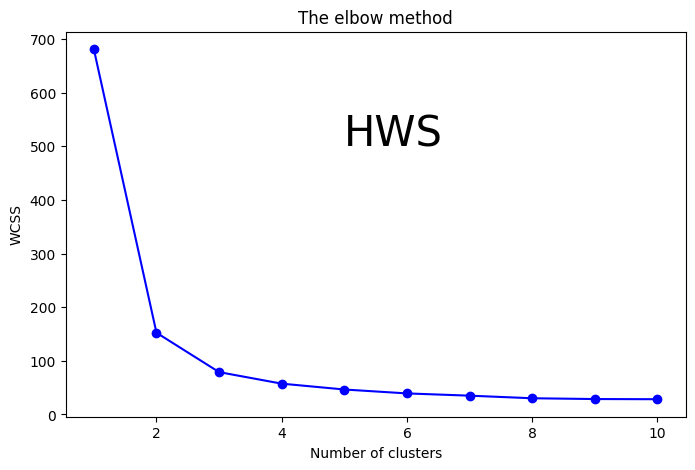

Accuracy without PCA: 0.9155, Time: 69.90 sec
Accuracy with PCA: 0.9231, Time: 60.89 sec


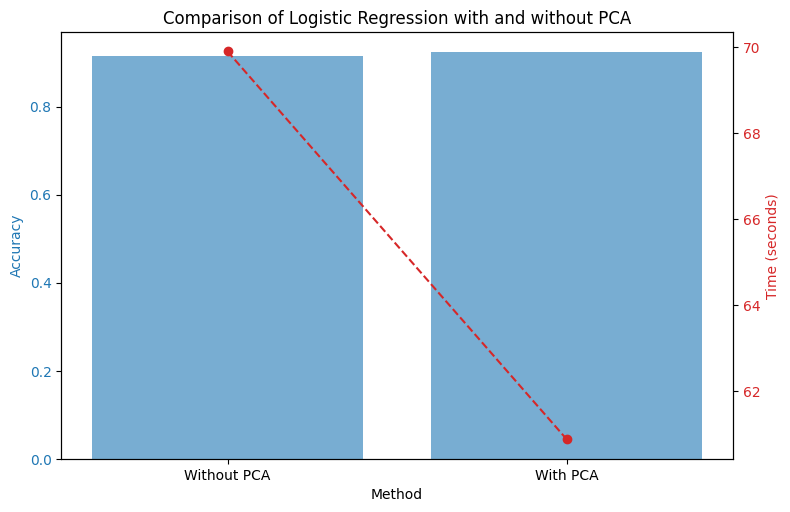

In [1]:
import time
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score


iris_url = "https://raw.githubusercontent.com/Harrisson3/diabetes/main/Iris.csv"
response = requests.get(iris_url)
iris_data = pd.read_csv(StringIO(response.text))

iris_data = iris_data.drop(columns=["Id", "Species"])

wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(iris_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("The elbow method")

plt.text(5, 500, "HWS", fontsize=30, color='black')

plt.savefig("elbow-1.jpg")
plt.show()


mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

start_time = time.time()
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
acc_without_pca = accuracy_score(y_test, y_pred)
time_without_pca = time.time() - start_time


pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


start_time = time.time()
logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_pca.fit(X_train_pca, y_train)
y_pred_pca = logisticRegr_pca.predict(X_test_pca)
acc_with_pca = accuracy_score(y_test, y_pred_pca)
time_with_pca = time.time() - start_time


print(f"Accuracy without PCA: {acc_without_pca:.4f}, Time: {time_without_pca:.2f} sec")
print(f"Accuracy with PCA: {acc_with_pca:.4f}, Time: {time_with_pca:.2f} sec")


labels = ["Without PCA", "With PCA"]
accuracy = [acc_without_pca, acc_with_pca]
time_taken = [time_without_pca, time_with_pca]

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel("Method")
ax1.set_ylabel("Accuracy", color='tab:blue')
ax1.bar(labels, accuracy, color='tab:blue', alpha=0.6, label="Accuracy")
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel("Time (seconds)", color='tab:red')
ax2.plot(labels, time_taken, color='tab:red', marker='o', linestyle='dashed', label="Time")
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title("Comparison of Logistic Regression with and without PCA")
plt.show()
